# Video Link: https://drive.google.com/file/d/1LC2U4baUn3W2MwQybZSSBzfLUuqkFqcb/view?usp=sharing

# COGS 108 - Fast Food and Income

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

Our project explored datasets of eceonomic incomes and fast food data of cities around the United States, looking for potential relationships between the two. We expected a negative linear relationship between average household income and fast food ratings, considering that the prioritization of quality from those of higher income might negatively affect the ratings of fast food restaurants. While we did see some slight trends in favor of our hypothesis, the results of tests were not statisitcally significant enough to support our hypothesis.

# Names

- Akar Singh
- Asya Balas
- Cody Lin
- Grant Duntugan
- Justin Wu

<a id='research_question'></a>
# Research Question

Does the average economic income of a city affect the ratings of fast food restaurants within cities in America?

<a id='background'></a>

## Background & Prior Work

The fast food restaurant industry in America has had a market size of 300 billion dollars in the past five years and is continuing to grow to this day[^IBISWorld]. These restaurant chains can contribute their success to convenient and fast access to food for many. Our group aims to find out if their success is dependent on a specific economic demographic within America. 

It is well known that fast food is strongly associated with obesity[^Rosenheck]. A review of 16 studies on fast food and obesity were reviewed to determine whether fast food causes obesity. A strong association between the two were found, which can be attributed to large portion sizes, high glycemic load, refined starch, added sugars, and high energy density of fast food. All of these factors lead to many people exceeding the recommended dietary intake. However, it is important to mention that it could not be proven that fast food causes obesity.

There have also been some research, albeit few, on how better perception of fast food can lead to increased consumption of fast food[^Min]. Review of perceptional studies found that positive perception of fast food such as thinking that it tasted good was associated with higher consumption, while those who thought fast food wasn't good was associated with lower consumption. One downside to these results is that the number of research papers published on this is very limited.

We hope that by exploring fast food ratings throughout different cities, we will be able to use this background info to make an assumption about fast food consumption and obesity within economic groups within America.

It is important to note that despite the number of research around fast food and sentiment, there have not been a lot of solid results that tie the two together. Therefore, statistically significant findings towards our hypothesis may not be able to say much about economic groups and fast food ratings.

[^IBISWorld]: IBISWorld. (2022, June). Fast Food Restaurants in the US - Market Size 2005 - 2028. Retrieved October 23, 2022, from https://www.ibisworld.com/industry-statistics/market-size/fast-food-restaurants-united-states/

[^Min]: Min J, Jahns L, Xue H, Kandiah J, Wang Y. Americans' Perceptions about Fast Food and How They Associate with Its Consumption and Obesity Risk. Adv Nutr. 2018 Sep 1;9(5):590-601. doi: 10.1093/advances/nmy032. PMID: 30084879; PMCID: PMC6140449.

[^Rosenheck]: Rosenheck, R. (2008), Fast food consumption and increased caloric intake: a systematic review of a trajectory towards weight gain and obesity risk. Obesity Reviews, 9: 535-547. https://doi.org/10.1111/j.1467-789X.2008.00477.x

# Hypothesis


We believe that fast food in lower income cities will be higher rated than those in higher income cities. This is because fast food is generally cheap and easier to access which can be positively seen in lower income cities. In higher income cities, we believe they will often have access to more options of higher quality food, and will rate fast food lower.

# Alternative Hypothesis

Fast food restaurant ratings will not have a significant statistical relationship to the average income of a city. The economical status of a city is very diverse and fast food provides reasonable benefits to a demographic of all economic statuses.

# Dataset(s)

## fast-food-restaurant-data.csv
Link: https://www.kaggle.com/datasets/datafiniti/fast-food-restaurants

\# Datapoints: 10,000

List of around 10K fast food restaurant data, comprised of restaurant name, address, city, country, keys, latitude, longitude, name, postalCode, province, & websites. However, we only used the name and location data.

## household-income-data.csv
Link: https://www.kaggle.com/datasets/goldenoakresearch/us-household-income-stats-geo-locations

\#: Datapoints: 32,526

List of around 32K household income data, comprised of id, State_Code, State_Name, State_ab, County, City, Place, Type, Primary, Zip_Code, Area_Code, ALand, AWater, Lat, Lon, Mean, Median, Stdev, sum_w.

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import patsy
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chisquare, normaltest

filename = "full_df_ver2.csv"
full_df = pd.read_csv(filename)

# Data Cleaning

For the actual code used, refer to the EDA Checkpoint file.

In order to clean the data, the following steps were taken:

1. Changed the column names to be consistent with underscore casing
2. Created a column for average city income info
3. Removed cities with non-positive income
4. Merged city income info with the restaurant info by city and state name
5. Added column to house usable links for the Google API
6. Used links to get rating info from Google API
7. Removed ratings that were either NA or 0
8. Removed Puerto Rico from the data


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

## Income

Before beginning the EDA aspect of our project, we wanted to get a general overview of our data and look at some descriptive statistics. Most importantly, we wanted to take a look at the average `mean_income`, the 75th percentile for `mean_income`, and average `median_income` for our dataset. Looking at these values is important for a couple reasons. One, it will give us a general value to compare against when looking at individual cities, meaning we will have an idea of which cities are above and below the 25th percentile for `mean_income` and average `median_income`. This will help us establish a reference point. Second, we also wanted to look at the average and distribution of `median_income` because we might want to look at the ratings as compared to `median_income`. We might want to do this later on in our EDA because in some countries, like the United States, the median income is a more accurate reflection of what the general population's income is rather than the mean income.

In [2]:
print(full_df['city'].value_counts())

full_df.describe()

Cincinnati    119
Las Vegas      71
Houston        62
Miami          58
Denver         52
             ... 
Seattle        16
Muncie         16
Kennewick      15
Roanoke        15
Dubuque        15
Name: city, Length: 64, dtype: int64


,Unnamed: 0,index,latitude,longitude,mean_income,median_income,standard_deviation_income,city_count,ff_rest_count,rating
count,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000,1887.000000
mean,953.202968,953.202968,36.689651,-93.217647,62957.619021,76992.563652,46029.301478,76.981982,36.040276,3.618919
std,551.337160,551.337160,5.343418,15.832218,12018.852075,24870.377202,6868.612154,69.960015,25.572770,0.443723
min,0.000000,0.000000,20.578696,-157.930853,27360.000000,18467.000000,17933.000000,1.000000,15.000000,1.000000
25%,475.000000,475.000000,33.480742,-103.202972,56694.954545,61552.000000,41722.840000,24.000000,20.000000,3.300000
50%,951.000000,951.000000,37.995684,-87.977720,63121.588235,74091.500000,44859.437500,64.000000,27.000000,3.600000
75%,1430.500000,1430.500000,40.077520,-84.144230,68297.500000,92485.227679,49482.953020,103.000000,41.000000,3.900000
max,1909.000000,1909.000000,52.022988,85.764873,107126.750000,300000.000000,72441.000000,298.000000,119.000000,5.000000


Here we see that the average `mean_income` for our dataset is $62,957.62 and that the average `median_income` is $76,992,56. We are also able to see that the top 25% of average incomes lies above $68,297.50. We'll explore the distributions below.

Text(0.5, 0, 'Amount in Dollars')

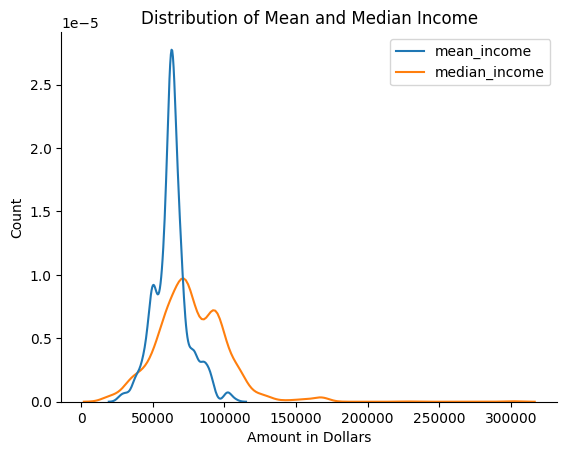

In [3]:
incomes = full_df[['mean_income', 'median_income']]
ax = sns.kdeplot(data=incomes)
sns.despine()
ax.set_title('Distribution of Mean and Median Income')
ax.set_ylabel('Count')
ax.set_xlabel('Amount in Dollars')

After creating the above density plot, we see than `median_income` is heavily right-skewed since we have some outliers above $100,000, so we might end up not using it to compare against the ratings after all. Or, if we do, we would need to egt rid of the outliers and revisit the distribution. Our `mean_income`, however, looks pretty good for the most part -- not overly skewed to the right or left.

We'll now generate a plot of the mean income on its own.

<AxesSubplot: xlabel='mean_income', ylabel='Count'>

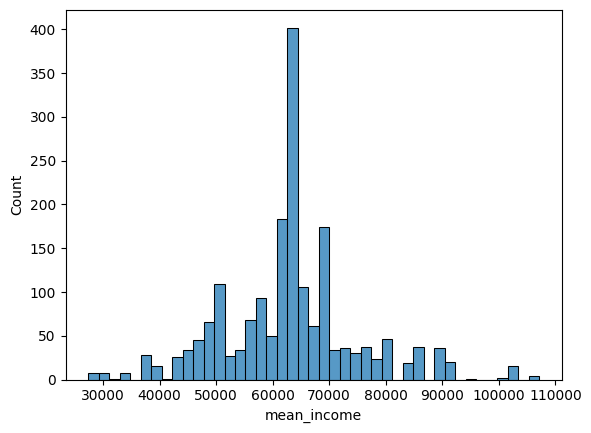

In [4]:
sns.histplot(data=full_df, x='mean_income')

In doing so, we see there are a couple of outliers in our data, but the distribution is pretty close to being normally distributed.

If we wanted to use the median income later on, we'll have to take a look at it's distribution, which we'll do below.

<AxesSubplot: xlabel='median_income', ylabel='Count'>

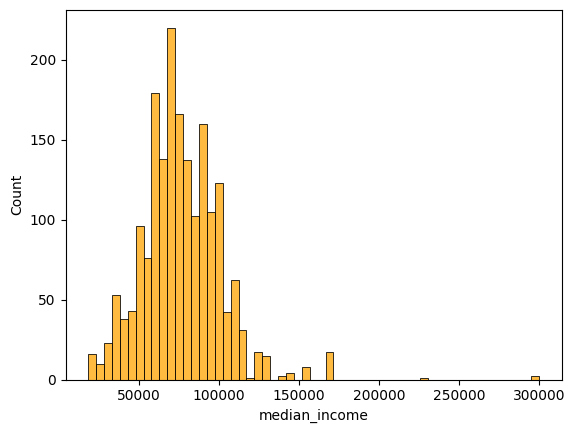

In [5]:
sns.histplot(data=full_df, x='median_income', color='orange')

For `median_income`, we can see we have quite a few outliers, so we'll get rid of those and store the data in `median_df`.

In [6]:
median_outliers = full_df[full_df['median_income'] > 140000]
median_outliers.describe()

,Unnamed: 0,index,latitude,longitude,mean_income,median_income,standard_deviation_income,city_count,ff_rest_count,rating
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,1337.875000,1337.875000,38.040792,-82.668589,86066.755208,171981.171875,53630.156250,2.718750,18.281250,3.715625
std,397.032033,397.032033,2.654698,4.779812,25091.323857,36435.436765,8737.793508,0.771859,6.769163,0.369052
min,796.000000,796.000000,27.878850,-97.322590,46993.500000,145654.500000,39523.000000,1.000000,15.000000,2.800000
25%,996.750000,996.750000,37.778975,-84.428427,53382.750000,155575.500000,42123.500000,2.000000,15.750000,3.575000
50%,1004.500000,1004.500000,39.270397,-84.368250,102373.333333,167430.333333,56526.000000,3.000000,16.000000,3.700000
75%,1597.250000,1597.250000,39.350176,-79.433022,102373.333333,167430.333333,56526.000000,3.000000,17.000000,3.900000
max,1909.000000,1909.000000,39.372200,-76.857860,107126.750000,300000.000000,72441.000000,4.000000,51.000000,4.900000


Dropped 32 outliers


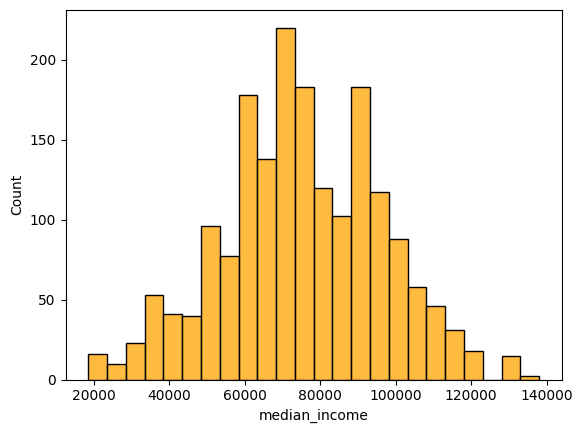

In [7]:
median_df = full_df.drop(median_outliers['index'].keys()).reset_index(drop=True)
sns.histplot(data=median_df, x='median_income', color='orange')
print(f"Dropped {len(median_outliers)} outliers")

With the 32 outliers with median incomes above $140,000 dropped, we see that our data looks more normally distributed. 

## Exploring Average Ratings from Top 25th Percentile and Bottom 25th Percentile

In our hypothesis, we predicted that fast food restaurants in areas with a higher average income will have a lower rating than those in areas with lower average incomes. We will consider "higher" average income to be cities whose average income falls within the upper quartile of our dataset, meaning their mean income is greater than or equal to `$68,297.50`. To help us get a visual and to further understand our distributions, we will split our `full_df` into two smaller dataframes: `higher_avg_income` will consist of restaurants that are from cities whose mean income is greater than or equal to `$68,297.50` and `lower_avg_income` consists of those equal to or below that value of $56501.53 or the bottom 25th percentile.

In [8]:
higher_avg_income = full_df[full_df['mean_income'] >= 68297.500000].dropna()
lower_avg_income = full_df[full_df['mean_income'] <= 56694.954545].dropna()

In [9]:
higher_avg_income.describe()

,Unnamed: 0,index,latitude,longitude,mean_income,median_income,standard_deviation_income,city_count,ff_rest_count,rating
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000
mean,1067.743689,1067.743689,37.416093,-98.775598,76992.961571,97222.256590,53468.334091,80.693204,33.650485,3.583689
std,471.029339,471.029339,6.311990,18.144941,9160.039464,23212.147105,5074.635467,64.150018,14.153074,0.456903
min,145.000000,145.000000,21.278965,-157.930853,68297.500000,49701.000000,43852.000000,1.000000,15.000000,1.000000
25%,866.500000,866.500000,32.770801,-111.832805,68991.285714,80527.492754,50253.773585,35.000000,21.000000,3.300000
50%,1000.000000,1000.000000,39.349340,-95.557600,74163.734375,93715.716981,53221.718750,64.000000,30.000000,3.600000
75%,1262.500000,1262.500000,41.185007,-84.458480,84613.951220,105993.000000,56526.000000,103.000000,38.000000,3.900000
max,1909.000000,1909.000000,47.732912,-73.925700,107126.750000,300000.000000,72441.000000,224.000000,62.000000,5.000000


In [10]:
lower_avg_income.describe()

,Unnamed: 0,index,latitude,longitude,mean_income,median_income,standard_deviation_income,city_count,ff_rest_count,rating
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,883.377193,883.377193,37.386808,-87.274609,47906.715782,54705.006872,37984.457714,50.975877,24.021930,3.589474
std,556.657653,556.657653,4.260473,8.424677,6369.142460,21637.179314,4291.600476,47.269783,8.838201,0.438803
min,23.000000,23.000000,25.822960,-114.154400,27360.000000,18467.000000,17933.000000,1.000000,15.000000,1.800000
25%,303.750000,303.750000,35.123493,-90.716037,44200.484375,42254.000000,36364.714286,9.000000,19.000000,3.300000
50%,829.500000,829.500000,38.038540,-86.122984,49594.095238,55443.000000,38552.000000,36.000000,21.000000,3.600000
75%,1465.250000,1465.250000,40.196126,-81.667373,51472.000000,60883.583333,40532.053691,69.750000,26.000000,3.900000
max,1907.000000,1907.000000,46.218350,-73.823600,56598.777778,169513.500000,54643.000000,174.000000,65.000000,5.000000


After splitting up our dataset, we see that we have 515 restaurants that are located in cities above or equal to the dataset's upper quartile for average income and 456 restaurants in cities below that value. Another interesting point to note is that the average rating in `higher_avg_income` is 3.58, whereas in `lower_avg_income` that value is 3.59. Just going off of that, it seems as though our hypothesis might NOT be supported by the data, but it's a little too early to tell for sure.

## Ratings with Mean Income

Before continuing on with our analysis with the income, it would also be nice to see the distribution of the ratings to understand the shape of that data.

<AxesSubplot: xlabel='rating', ylabel='Count'>

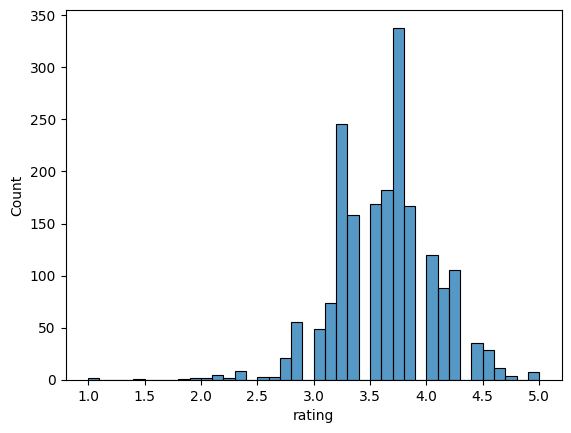

In [11]:
sns.histplot(data=full_df, x='rating', bins=40)

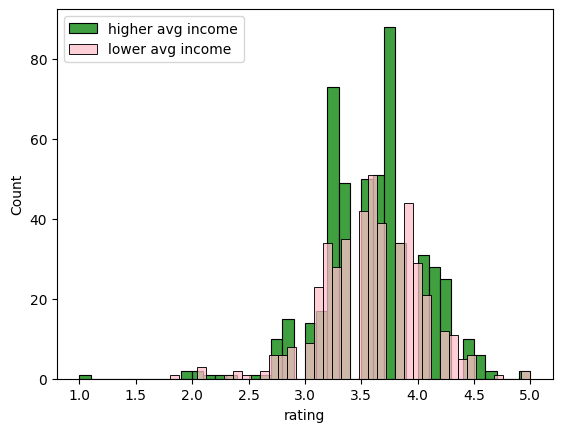

In [12]:
ax = sns.histplot(data=higher_avg_income, x='rating', color='green',bins=40, label='higher avg income')
ax = sns.histplot(data=lower_avg_income, x='rating', color='pink', bins=40, label='lower avg income')

ax.legend()

Since we have different total count data in lower and higher income brackets, it would be more accurate to visualize the data using propotions.

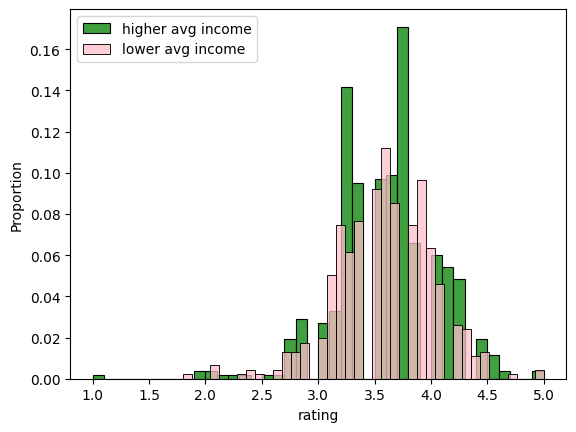

In [13]:
higher_avg_income['rating_prop'] = higher_avg_income['rating']/sum(higher_avg_income['rating'])
lower_avg_income['rating_prop'] = lower_avg_income['rating']/sum(lower_avg_income['rating'])

ax = sns.histplot(data=higher_avg_income, x='rating', color='green',bins=40, label='higher avg income', stat="proportion")
ax = sns.histplot(data=lower_avg_income, x='rating', color='pink', bins=40, label='lower avg income', stat="proportion")

ax.legend()

While the above graphs are interesting because we see the histogram for the lower average income dataframe have a relatively similar shape to that of the ratings histogram for the full dataset, we can't take this at face value because we also need to account for the fact that we don't have the same number of entries in `higher_avg_income` as we do in `lower_avg_income`. We can also see that we have a couple outliers on the lower end of the spectrum in both our dataframes.

We'll identify and get rid of the outliers before moving on to anything else.

In [14]:
outliers = full_df[full_df['rating'] < 1.5]
outliers

,Unnamed: 0,index,name,city,state_ab,address,postal_code,latitude,longitude,state_name_x,mean_income,median_income,standard_deviation_income,city_count,state_name_y,ff_rest_count,text_input,rating
1235,1250,1250,Pizza Hut,Atlanta,GA,2090 Dunwoody Club Dr,30350,33.960437,-84.300962,Georgia,76480.661290,74091.500000,55154.629032,62,Georgia,38,Pizza%20Hut%20Atlanta%20GA%20%202090%20Dunwood...,1.0
1307,1322,1322,Dominos Pizza,Las Vegas,NV,6375 S Pecos Rd,89120,36.074010,-115.101580,Nevada,62934.269231,86190.176923,43015.392308,130,Nevada,65,Dominos%20Pizza%20Las Vegas%20NV%20%206375%20S...,1.4
1703,1722,1722,Pizza Hut,Los Angeles,CA,12460 Venice Blvd,90066,34.002970,-118.434440,California,61724.557018,73435.833333,48167.978070,228,California,33,Pizza%20Hut%20Los Angeles%20CA%20%2012460%20Ve...,1.0


In [15]:
ratings_df = full_df.drop(outliers['index'].keys()).reset_index(drop=True)

To drop the outliers, we got rid of any entries that had a rating less than 1.5, for a total of 3 restaurants dropped without having a large affect on our dataset.

<AxesSubplot: xlabel='rating', ylabel='Count'>

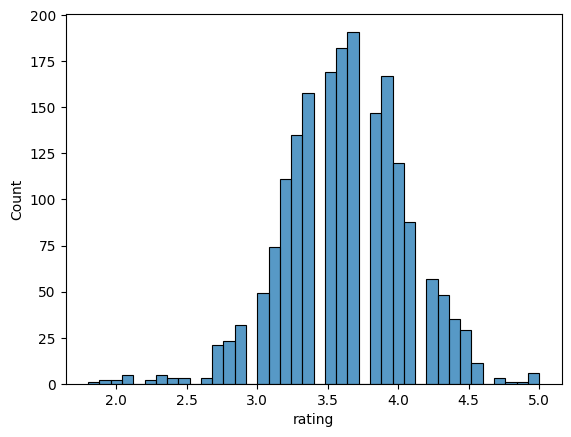

In [16]:
sns.histplot(data=ratings_df, x='rating', bins=40)

With the outliers dropped, we are able to generate the above graph and see that the distribution for the ratings has become closer to being normally distributed. Here we can begin comparing the two mean distributions of the higher income and lower income by using a ttest.

In [17]:
t_test = ttest_ind(lower_avg_income['rating'], higher_avg_income['rating'])

t_test.pvalue

0.8410739703717939

Text(0.5, 0, 'ratings')

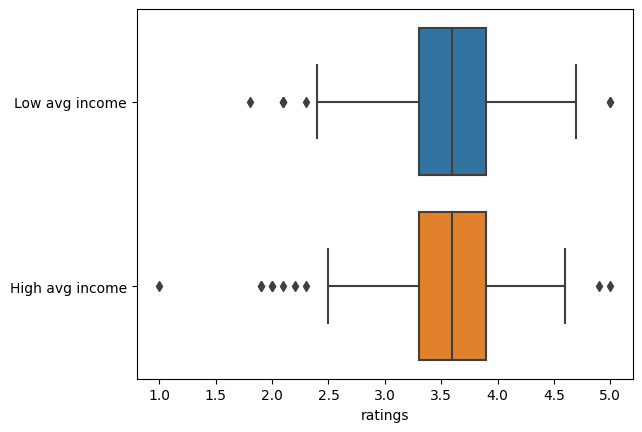

In [18]:
rating_boxplot = sns.boxplot(pd.DataFrame({'Low avg income': lower_avg_income['rating'], 'High avg income': higher_avg_income['rating']}), orient='h')
rating_boxplot.set_xlabel('ratings')

Since the p-value of 0.841 > 0.05, we to fail reject the null hypothesis and the data suggest that there is NOT a significant difference between the rating and the income. We will continue our analyisis with linear regression before arriving to our final decision.

## Inferential Analysis with Mean Income

Now that we have seen the distribution for both our variables of interest on their own (`mean_income` and `ratings`), it's time to carry out the inferential analysis.

We'll start by plotting the relationship between mean income and ratings.

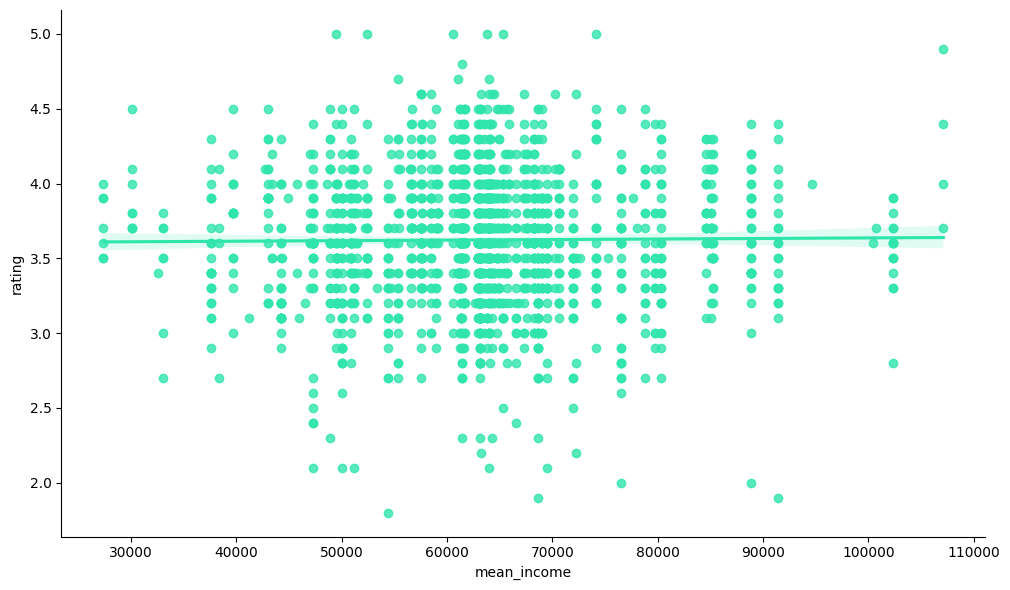

In [19]:
sns.lmplot(data=ratings_df, x='mean_income', y='rating', fit_reg = True, height=6, aspect=1.7, line_kws={'color':'#30E5AC'}, scatter_kws={'color':'#30E5AC'})

Looking at the above plot, it appears that there is a slightly negative relationship between mean income and rating, though it is a little hard to say.

In [20]:
outcome_mean, predictors_mean = patsy.dmatrices('rating ~ mean_income', full_df)

mod_log = sm.OLS(outcome_mean, predictors_mean)
res_log = mod_log.fit()
print(res_log.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.08527
Date:                Thu, 08 Dec 2022   Prob (F-statistic):              0.770
Time:                        17:04:06   Log-Likelihood:                -1143.7
No. Observations:                1887   AIC:                             2291.
Df Residuals:                    1885   BIC:                             2302.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       3.6033      0.055     66.115      

# Ethics & Privacy

Some of the ethical issues that could arise from our project come from data collection.

There has been previous research about fast food restaurant density being higher within lower income areas as opposed to higher income areas. This could create a sample bias within our data that overrepresents lower income cities compared to higher income cities. Our fast food location data is also only as reliable as Datafiniti is, and as up to date as when they collected it. This means that our analysis wouldn't necessarily be applicable today and can only be applicable assuming this trend holds.

There could also potentially be issues merging datasets with fast food restaurant info and household income info. If household income data in a specific city doesn't have a lot of sample sizes, the average household info in that city can be misrepresented. 

Along the same line, if there is a lot of data for fast food restaurants in one city but not a lot for income data and vice versa, analyses could end up being biased. To account for this issue, we only kept data for cities that had at least 15 restaurants. 

Similarly, when doing our EDA, we saw that our data didn’t accurately represent the income levels in the United States. To try and accurately represent income groups and hopefully account for misrepresentation, we split up our data using the average income of our dataset, rather than based on US income class data. However, in the process of our splitting the data, it is possible that we created a problem that wouldn’t allow for equitable analysis. To combat this, we then used proportions in the split datasets. 
There is also a large issue with collecting fast food rating data in a practical manner. Ratings of fast food restaurants within cities can be distributed very unevenly across websites. Since Google Reviews typically had more reviews that Yelp, we went with Google Reviews to collect our average review information for each restaurant. However, we also wanted to ensure that we would be able to use a restaurant and it’s rating, so in the case of localized fast food chains, we threw those out because they weren’t comparable across cities within America. Additionally, we got rid of restaurants that had either no review or a 0.0 rating to make sure they didn’t skew the data. This could have possibly affected our analysis, but we made sure to look those restaurants up by-hand and about 99% of the time, those restaurants had gone out of business and thus their ratings shouldn’t have been included anyway. 

Aside from issues with the collection of data, there is another issue that raises a relatively large ethical concern. Since our hypothesis states that we believe cities with lower average income will have higher reviews for fast food restaurants than those with higher average incomes, it is entirely possible that our analysis could be misconstrued as trying to determine if people with lower income having poor taste rather than determining if lower average income correlates to higher average reviews. Though unlikely, people could then take that idea with them when thinking about all types of restaurants and apply this bias in that situation, which would take the analysis far out of its scope and thus unintentionally bias another project. 

In terms of privacy, we didn’t really have any concerns. As our restaurant review data was collected from Google Maps with an API, we were able to specify that we only wanted the value of the review and none of the information about any of the reviewers, we don’t have any privacy concerns from that end. Additionally, our data concerning restaurant locations and city income also do not specify any single person, meaning that we don’t really have any privacy concerns with this project.


# Conclusion & Discussion

Based off the results of our t-tests and linear regression results, we lack a strong foundation to support our hypothesis - i.e. there is no strong correlation between the average household income of a cities and the average ratings of fast food restaurants within those cities. Our t-test had too large of a p-value and the slope of our Linear Regression was a very slight negative, meaning not only was unlikely for there to be a correlation but if there were, they would be only a slight correlation.

Some noteworthy nuances to our data include: high variance within the city income data, with multiple instances of data in which the deviation were much greater than central tendencies; exclusion of certain cities without enough fast food restaurant data to support our analyses; city income distributions not matching national income distributions - this led to difficulties in classifying data as high income. These issues would largely affect our t-test analysis. The high variance and lack of conformity to a national distribution affects the calculation of our p-value. Additionally, any change to our classification method for high/low income would drastically change our input into our t-test. Due to these various uncertainties, we resorted to inferential analysis using mean income and rating data to check if we'd find some significant results in linear regression. 

Visually, our regression line was nearly a straight horizontal line. This observation was supported by the OLS Regression results in many ways: The coefficient (2.483E-7) and it's 95% Confidence Interval range of (-1.42e-06, 1.92e-06) could almost be mistaken for a rounding error and indicate the slope could've very easily have been either negative or positive; The P-Val for the coefficient, similar to our p-val for our t-test, has a large value of 0.77 which further indicates the high likelihood of these results being generated by random chance; Finally, an $R^2$ value of 0 implies there is no discernable correlation between rating and mean income.

# Team Contributions

### Everyone:
- Attended weekly meetings
- Meeting notes
- Engaged in discussions
- Came up with research topic
- Discussed weekly plans and steps needed to take before each checkpoint
- Reviewed pull requests for the repository
- Team video

### Akar:
- Explored webscraping options in Python and other languages
- Code to pull nearby restauraunt locations off of a central location point
- Finished Overview portion of the final project
- Finished Conclusion and Discussion portion of the final project
- Statistical analyses in the EDA portion of the project
- Revised EDA portion after new data filtering added
- Handled GitHub repo issues

### Asya:
- Updated ethics and privacy from project proposal
- Primarily worked on the initial EDA steps for the checkpoint
- Researched Google API documentation for restauraunt info
- Statistical analyses in the EDA portion of the project

### Cody:
- Finished Overview portion of the final project
- Finished Conclusion and Discussion portion of the final project
- Handled recording process for the team video

### Grant:
- Finished writeup for the Project Proposal 
- Wrote code for the data cleaning in the Data Checkpoint
- Explored API options and webscraping options for restaurant info

### Justin:
- Found datasets
- Explored the feasibility of heatmap analysis
- Mapped restaurant rating density on a US map of our data
- Statistical analyses in the EDA portion of the project